# LacZ/LacY model

Citation:
1. Kierzek, Andrzej M. 2002. “STOCKS: STOChastic Kinetic Simulations of Biochemical Systems with Gillespie Algorithm.” Bioinformatics 18 (3): 470–81. https://doi.org/10.1093/bioinformatics/18.3.470.

In [1]:
from reactionmodel.model import Species, Reaction, Model
import numpy as np

In [2]:
LacZ = Species('LacZ')
LacY = Species('LacY')

PLac = Species('PLac')

RNAP = Species('RNAP')

PLacRNAP = Species('PLacRNAP')


TrLacZ1 = Species('TrLacZ1')
TrLacY1 = Species('TrLacY1')

TrLacZ2 = Species('TrLacZ2')
TrLacY2 = Species('TrLacY2')

Ribosome = Species('Ribosome')

RbsLacZ = Species('RbsLacZ')
RbsLacY = Species('RbsLacY')

TrRbsLacZ = Species('TrRbsLacZ')
TrRbsLacY = Species('TrRbsLacY')

dgrLacZ = Species('dgrLacZ')
dgrLacY = Species('dgrLacY')

dgrRbsLacZ = Species('dgrRbsLacZ')
dgrRbsLacY = Species('dgrRbsLacY')

RbsRibosomeLacZ = Species('RbsRibosomeLacZ')
RbsRibosomeLacY = Species('RbsRibosomeLacY')

LacZlactose = Species('LacZlactose')

lactose = Species('lactose')
product = Species('product')

species = [
    LacZ,
    LacY,
    PLac,
    RNAP,
    PLacRNAP,
    TrLacZ1,
    TrLacY1,
    TrLacZ2,
    TrLacY2,
    Ribosome,
    RbsLacZ,
    RbsLacY,
    TrRbsLacZ,
    TrRbsLacY,
    dgrLacZ,
    dgrLacY,
    dgrRbsLacZ,
    dgrRbsLacY,
    RbsRibosomeLacZ,
    RbsRibosomeLacY,
    lactose,
    LacZlactose,
    product,
]

reactions = [
    Reaction([PLac, RNAP], [PLacRNAP], k=0.17),
    Reaction([PLacRNAP], [PLac, RNAP], k=10),
    Reaction([PLacRNAP], [TrLacZ1], k=1),
    Reaction([TrLacZ1], [RbsLacZ, PLac, TrLacZ2], k=1),
    Reaction([TrLacZ2], [TrLacY1], k=0.015),
    Reaction([TrLacY1], [RbsLacY, TrLacY2], k=1),
    Reaction([TrLacY2], [RNAP], k=0.36),
    Reaction([Ribosome, RbsLacZ], [RbsRibosomeLacZ], k=0.17),
    Reaction([Ribosome, RbsLacY], [RbsRibosomeLacY], k=0.17),
    Reaction([RbsRibosomeLacZ], [Ribosome, RbsLacZ], k=0.45),
    Reaction([RbsRibosomeLacY], [Ribosome, RbsLacY], k=0.45),
    Reaction([RbsRibosomeLacZ], [TrRbsLacZ, RbsLacZ], k=0.4),
    Reaction([RbsRibosomeLacY], [TrRbsLacY, RbsLacY], k=0.4),
    Reaction([TrRbsLacZ], [LacZ], k=0.015),
    Reaction([TrRbsLacY], [LacY], k=0.036),
    Reaction([LacZ], [dgrLacZ], k=6.42e-5),
    Reaction([LacY], [dgrLacY], k=6.42e-5),
    Reaction([RbsLacZ], [dgrRbsLacZ], k=0.3),
    Reaction([RbsLacY], [dgrRbsLacY], k=0.3),
    Reaction([LacZ, lactose], [LacZlactose], k=9.52e-5),
    Reaction([LacZlactose], [product, LacZ], k=431),
    Reaction([LacY], [lactose, LacY], k=14),
]

# but ribosome and RNAP are supposed to grow over time as volume of the cell decreases (which also affects rate constants of all second order rates, this seems too complicated for us!)

m = Model(species, reactions)

In [3]:
initial = {
    'PLac': 1,
    'RNAP': 35,
    'Ribosome': 350,
}

In [4]:
y0 = m.make_initial_condition(initial)

## Simulation

In [5]:
from hybrid.gillespie import GillespieSimulator

simulator = GillespieSimulator(
    m.get_k(),
    m.stoichiometry(),
    m.kinetic_order(),
)

In [14]:
result = simulator.simulate([0, 2000.0], y0, np.random.default_rng(), history_length=1e8)

4.502346590967956

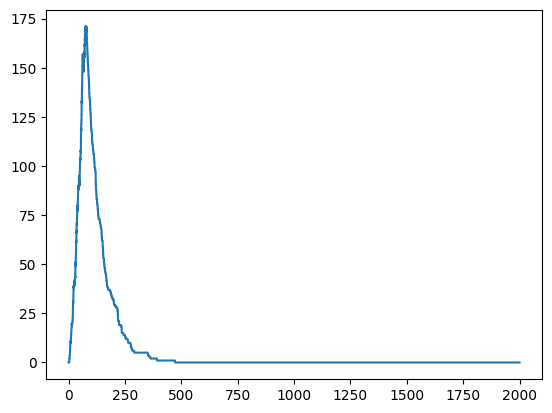

In [26]:
import matplotlib.pyplot as plt

s = TrRbsLacZ
s_history = result.y_history[m.species.index(s), :]

plt.plot(result.t_history, s_history)
np.mean(s_history)

In [15]:
result.y

array([2.480000e+02, 6.800000e+01, 1.000000e+00, 2.300000e+01,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.200000e+01,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 2.800000e+01, 4.000000e+00,
       4.120000e+02, 4.000000e+02, 0.000000e+00, 0.000000e+00,
       4.005500e+04, 2.000000e+00, 1.848423e+06])

In [16]:
result.status_counter

Counter({<GillespieStepStatus.stochastic: 2>: 5598332,
         <GillespieStepStatus.t_end: 0>: 1})

In [18]:
t_2000_result = result.y
t_2000_result

array([2.480000e+02, 6.800000e+01, 1.000000e+00, 2.300000e+01,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.200000e+01,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 2.800000e+01, 4.000000e+00,
       4.120000e+02, 4.000000e+02, 0.000000e+00, 0.000000e+00,
       4.005500e+04, 2.000000e+00, 1.848423e+06])